# EDA:

### Importing Dataset:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


df = pd.read_csv("../data/raw/Dataset.csv")

print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)

Shape of dataset: (50000, 2)
Columns: ['review', 'sentiment']


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Basic info & missing values

In [15]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


### Class balance:

In [16]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Peek at reviews

In [17]:
print("Positive review example:\n", df[df['sentiment']=="positive"].iloc[0,0])
print("\nNegative review example:\n", df[df['sentiment']=="negative"].iloc[0,0])

Positive review example:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of 

### Review length analysis:

                                              review  review_length
0  One of the other reviewers has mentioned that ...            307
1  A wonderful little production. <br /><br />The...            162
2  I thought this was a wonderful way to spend ti...            166
3  Basically there's a family where a little boy ...            138
4  Petter Mattei's "Love in the Time of Money" is...            230


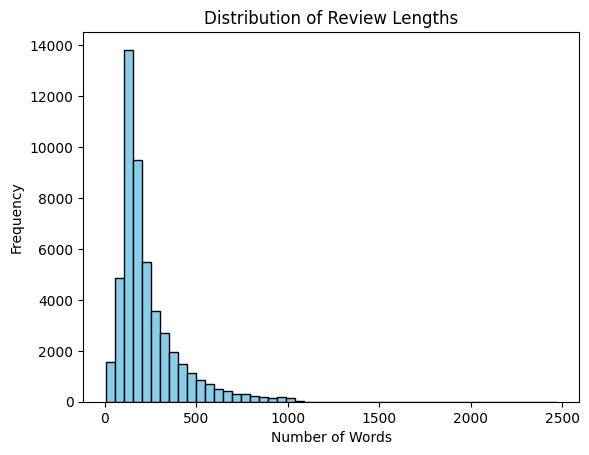

Average length per sentiment:
sentiment
negative    229.46456
positive    232.84932
Name: review_length, dtype: float64


In [18]:
# Creating a new column with word counts
df["review_length"] = df["review"].apply(lambda x: len(str(x).split()))
print(df[["review", "review_length"]].head())

# Histogram of review lengths
plt.hist(df["review_length"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Compare by sentiment
print("Average length per sentiment:")
print(df.groupby("sentiment")["review_length"].mean())


### Words distribution:

In [19]:
print(df['review_length'].describe())

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


## WordCloud visual insight:

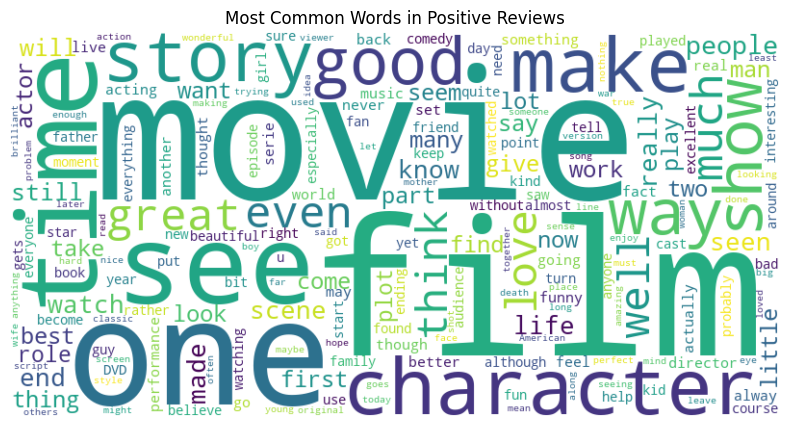

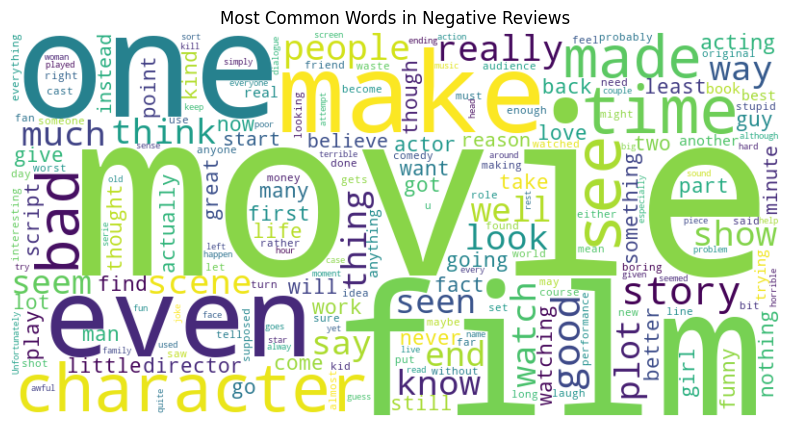

In [21]:
from wordcloud import STOPWORDS

# Add 'br' to the default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["br"])

# Positive reviews
pos_text = " ".join(df[df['sentiment']=="positive"]["review"])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white", stopwords=custom_stopwords).generate(pos_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Positive Reviews")
plt.show()

# Negative reviews
neg_text = " ".join(df[df['sentiment']=="negative"]["review"])
wordcloud_neg = WordCloud(width=800, height=400, background_color="white", stopwords=custom_stopwords).generate(neg_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Negative Reviews")
plt.show()
